<a href="https://colab.research.google.com/github/Lipow17/2024_Intro_Python/blob/main/W3_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercise) Earthquake Data Analysis

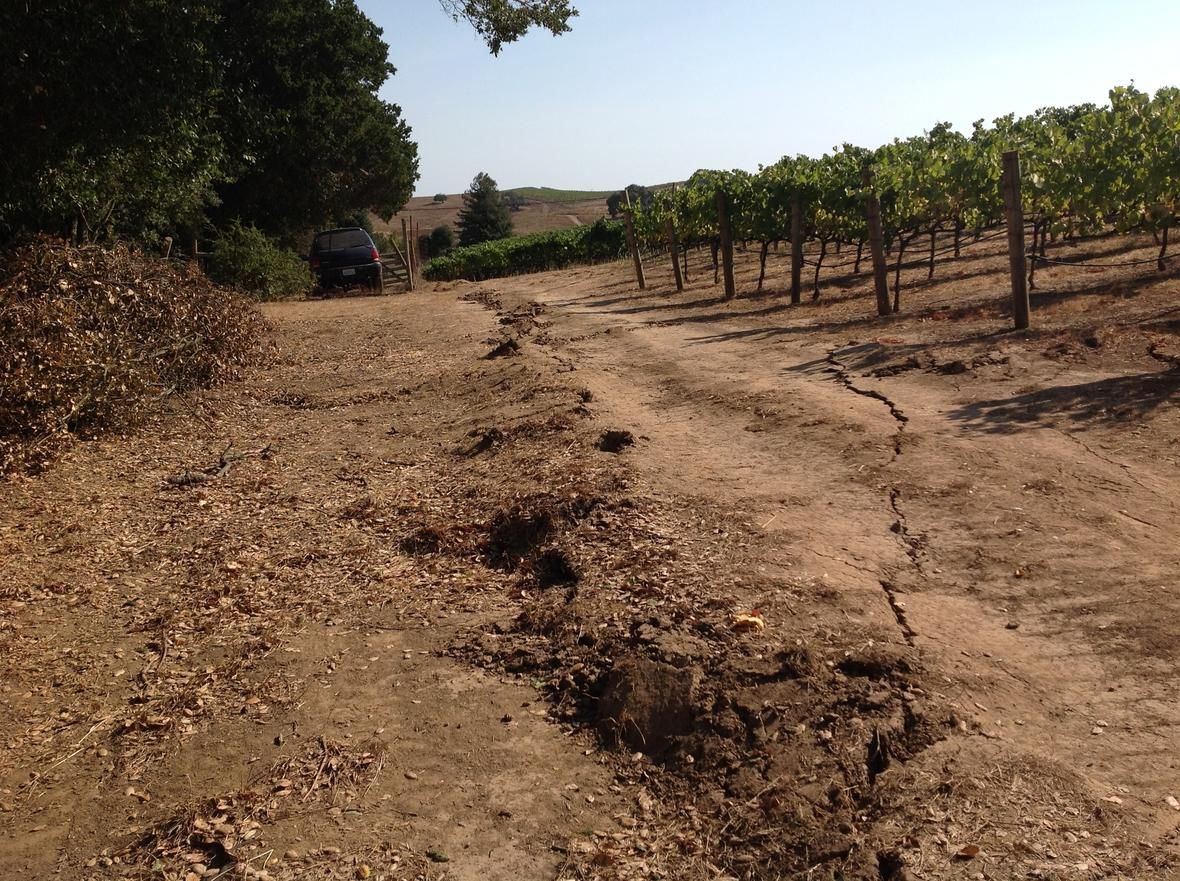

**2014 South Napa CA M6 Earthquake - August 24**

Continuous "mole-track" running parallel to the strike of the fault indicates some E-W compression in addition to [right-lateral faulting](https://www.usgs.gov/faqs/what-fault-and-what-are-different-types). Photo taken near Buhman Rd.

Source: *USGS*

In this assignment, we will review `pandas` fundamentals, such as how to

* Open csv files

* Manipulate dataframe indexes

* Parse date columns

* Examine basic dataframe statistics

* Manipulate text columns and extract values

* Plot dataframe contents using
<ul type="circle">
<li>Bar charts</li>
<li>Histograms</li>
<li>Scatter plots</li>
</ul>

Data for this assignment in .csv format downloaded from the USGS Earthquakes Database is available at:

https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/Efg089STo25Gq6N_BBn_qGoBIsAOd2yUNBgeTfPR2wxw4g?download=1

You don’t need to download this file. You can open it directly with Pandas, with a little help from Pooch (don't worry about reading into the [Pooch documentation](https://www.fatiando.org/pooch/latest/), unless you really want to! 😃).

We'll load the datafile into memory and store the path to the file in the variable `datafile`

In [4]:
# Pooch Code
import pooch
datafile = pooch.retrieve('https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/Efg089STo25Gq6N_BBn_qGoBIsAOd2yUNBgeTfPR2wxw4g?download=1',
                          known_hash='84d455fb96dc8f782fba4b5fbe56cb8970cab678f07c766fcba1b1c4674de1b1')

**Q1) First, import `Numpy`, `Pandas` and `Matplotlib` and (optional) set the display options.**

Hint: Display options are documented [at this link](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html)

In [5]:
# Import all libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#@markdown Fill in the blank version. Double click to reveal
import numpy as __
import pandas as __
import matplotlib.pyplot as ___

**Q2) Use Pandas’ `read_csv` function directly on the datafile to open it as a `DataFrame`**

The dataframe should look something like this

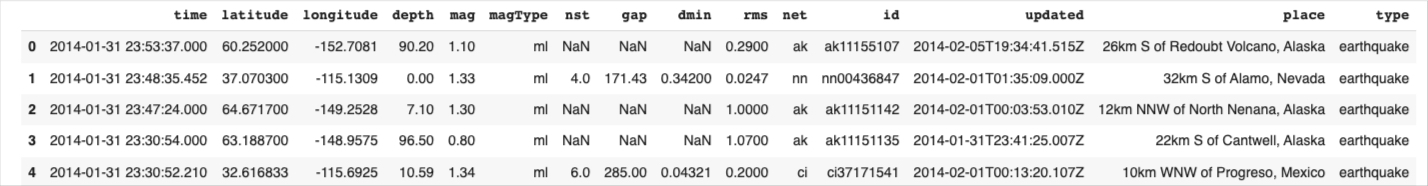

To display the first few rows of the table, you will use `.head()` function. To display information, use `.info()` function.

Check out these tutorials if you have doubts about what these functions do.

[.head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)

[.info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info)

In [6]:
# Open the URL as a Pandas' DataFrame
df = pd.read_csv(datafile)

In [7]:
# Display first few rows
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [8]:
# Display DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120108 non-null  object 
 1   latitude   120108 non-null  float64
 2   longitude  120108 non-null  float64
 3   depth      120107 non-null  float64
 4   mag        120065 non-null  float64
 5   magType    120065 non-null  object 
 6   nst        59688 non-null   float64
 7   gap        94935 non-null   float64
 8   dmin       85682 non-null   float64
 9   rms        119716 non-null  float64
 10  net        120108 non-null  object 
 11  id         120108 non-null  object 
 12  updated    120108 non-null  object 
 13  place      120108 non-null  object 
 14  type       120108 non-null  object 
dtypes: float64(8), object(7)
memory usage: 13.7+ MB


In [ ]:
#@markdown Fill in the blank version. Double click to reveal
# Open the URL as a Pandas' DataFrame
df = pd.read_csv(__)
# Display first few rows
df.____()
# Display DataFrame info
df.____()

The dates were not automatically parsed into `datetime` types!
What can we do?

**Q3) Re-read the data in such a way that all date columns are identified as dates and the earthquake ID is used as the index**

Recreate the screenshot below.

Hint: The documentation for `.read_csv()` function is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html?highlight=read_csv)

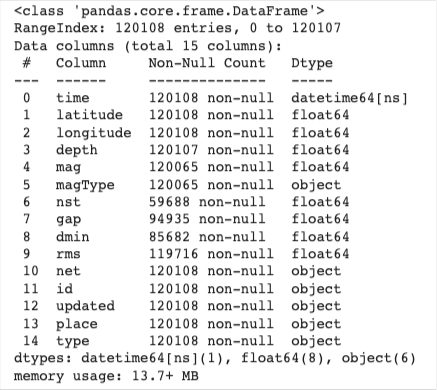

In [9]:
# Re-read the URL
df = pd.read_csv(datafile,parse_dates=['time'])
df = df.set_index('id')

In [10]:
# Use the `head` function to check that it worked
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [11]:
# Use the `info` function to check that it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   time       120108 non-null  datetime64[ns]
 1   latitude   120108 non-null  float64       
 2   longitude  120108 non-null  float64       
 3   depth      120107 non-null  float64       
 4   mag        120065 non-null  float64       
 5   magType    120065 non-null  object        
 6   nst        59688 non-null   float64       
 7   gap        94935 non-null   float64       
 8   dmin       85682 non-null   float64       
 9   rms        119716 non-null  float64       
 10  net        120108 non-null  object        
 11  updated    120108 non-null  object        
 12  place      120108 non-null  object        
 13  type       120108 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 13.7+ MB


In [ ]:
#@markdown Fill in the blank version. Double click to reveal
# Re-read the URL
df = pd.read_csv(__,__=__)
# Use the `head` function to check that it worked
df.___()
# Use the `info` function to check that it worked
df.___()

**Q4) Use `describe` to get the basic statistics of all the columns**

Hint: The documentation of `describe` is [at this link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [12]:
# Use the `describe` function
df.describe()

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,2014-07-05 09:10:37.116720128,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
min,2014-01-01 00:01:16.610000,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,2014-04-08 03:43:10.768999936,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,2014-07-07 10:44:06.035000064,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,2014-09-30 23:36:40.595000064,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,2014-12-31 23:54:33.900000,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000
std,NaN,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046


In [ ]:
#@markdown Fill in the blank version. Double click to reveal
# Use the `describe` function
___.___()

**Q5) Use `nlargest` to get the top 20 earthquakes by magnitude**

Hint: The documentation of `nlargest` is [at this link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html)

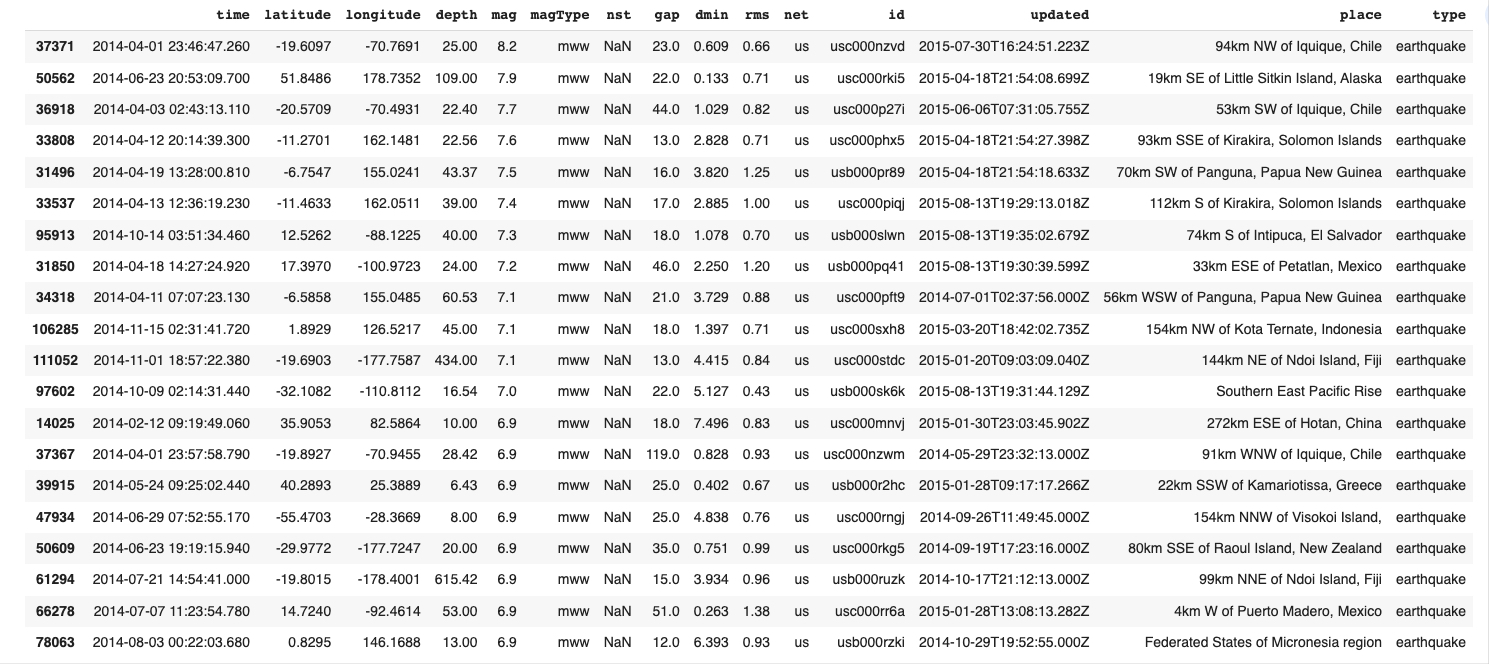

In [13]:
# Use `nlargest`
df.nlargest(20, 'mag')

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
usc000nzvd,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
usc000rki5,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
usc000p27i,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
usc000phx5,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
usb000pr89,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
usc000piqj,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.885,1.00,us,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
usb000slwn,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.078,0.70,us,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
usb000pq41,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.250,1.20,us,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
usc000pft9,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.729,0.88,us,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake


In [ ]:
#@markdown Fill in the blank version. Double click to reveal
# Use `nlargest`
df.___(___,___)

Examine the column titled 'place'.
It seems to contain both state and country information. How would you get it out?

**Q6) Extract the state or country using `Pandas` text data functions, and add it as a new column to the `DataFrame`**

Hint 1: The documentation for Pandas' text data functions is [here](https://pandas.pydata.org/pandas-docs/stable/text.html)

Hint 2: You will use `.split()` to extract the country names. The documentation of this function can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html?highlight=split#pandas.Series.str.split)

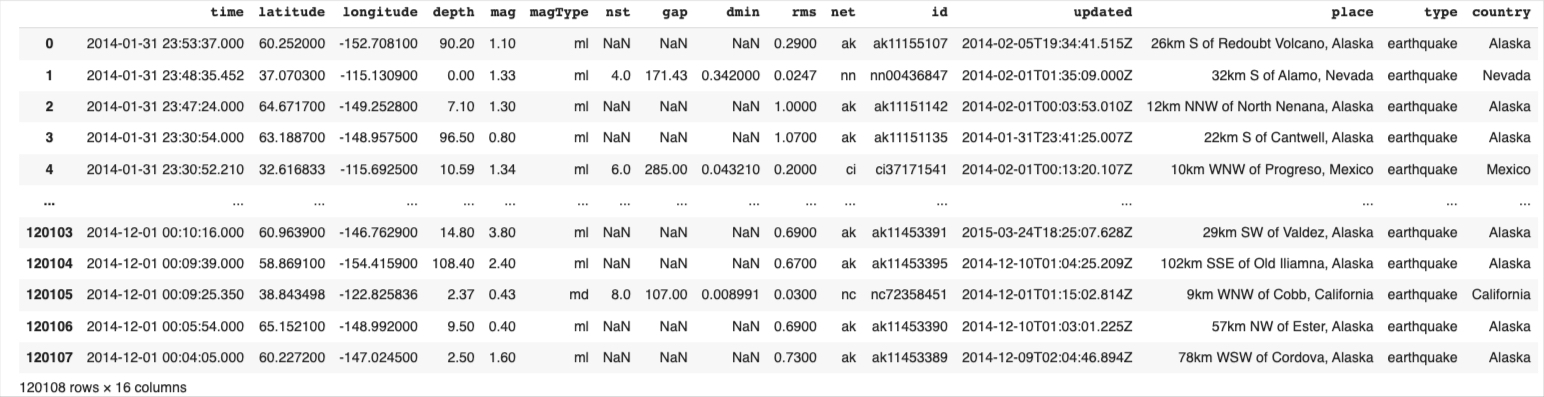

In [16]:
# Extract the state or country
country = df.place.str.split(',',expand=True,n=2)

In [19]:
# Add it as a new column to the `DataFrame` called `country`
df['country'] = country[1]

In [ ]:
#@markdown Fill in the blank version. Double click to reveal
# Extract the state or country
country = df.__.str.__(',',expand=True,n=_)

# Add it as a new column to the `DataFrame` called `country`
df['____'] = _______

**Q7) Display each unique value from the new `country` column**

Hint: You may use the `unique` function documented [at this link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html)

You should see an array with different country and state names (e.g., array(['Alaska','Nevada',...]))

In [20]:
# Display unique values
df.country.unique()

array([' Alaska', ' Nevada', ' Mexico', ' California',
       ' Papua New Guinea', ' New Zealand', ' Missouri', None, ' Montana',
       ' British Virgin Islands', ' Washington', ' Oregon', ' Canada',
       ' Fiji', ' Antarctica', ' Chile', ' Utah', ' Indonesia',
       ' Solomon Islands', ' Micronesia', ' Oklahoma', ' Hawaii',
       ' Wyoming', ' Russia', ' Arizona', ' Philippines', ' Bolivia',
       ' Greece', ' Japan', ' Puerto Rico', ' Iran', ' Tonga',
       ' Wallis and Futuna', ' Colorado', ' Guam', ' CA', ' Idaho',
       ' Pakistan', ' Burma', ' China', ' Peru', ' Costa Rica',
       ' East Timor', ' Japan region', ' Northern Mariana Islands',
       ' El Salvador', ' Samoa', ' Taiwan', ' Arkansas',
       ' South Sandwich Islands', ' Colombia', ' Dominican Republic',
       ' Argentina', ' Texas', ' New Hampshire', ' Saint Helena',
       ' Tanzania', ' Vanuatu', ' Bosnia and Herzegovina', ' India',
       ' American Samoa', ' Tennessee', ' Kentucky', ' Serbia',
       ' N

In [ ]:
#@markdown Fill in the blank version. Double click to reveal
# Display unique values
df.___.___()

**Q8) Create a filtered dataset that only has earthquakes larger than magnitude 4**

Hint: Print the table to see the name of the column containing the earthquake magnitude.

Check out this [link](https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/) to find examples of filtering by column values

In [37]:
# Filter the dataset based on the earthquakes' magnitudes
df_filtered = df[df.mag > 4]
df_filtered.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000mqlp,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,2014-04-08T01:43:19.000Z,"115km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
usc000mqln,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,2014-04-08T01:43:19.000Z,"120km N of Raoul Island, New Zealand",earthquake,New Zealand
usc000mqls,2014-01-31 22:49:49.740,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,2014-04-08T01:43:19.000Z,South of the Fiji Islands,earthquake,None
usc000mf1x,2014-01-31 22:19:44.330,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,2014-04-08T01:43:19.000Z,"72km E of Amatignak Island, Alaska",earthquake,Alaska
usc000mqlm,2014-01-31 21:56:44.320,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,2014-04-08T01:43:19.000Z,"100km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea


**Q9) Using the filtered dataset (magnitude > 4), count the number of earthquakes whose magnitudes >4 [Num 1], count the number of earthquakes in each country/state [Num 2]. Make a bar chart of Num2 for the top 5 locations with the most earthquakes**

Hint 1: To get Num 1, `Pandas` has a `count` function documented [at this link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html)

Hint 2: Check out the `value_counts` function to get Num 2


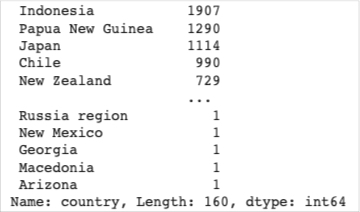

In [25]:
# Count the number of earthquakes whose magnitudes are larger than 4
df_filt = df[df['mag'] > 4]
df_filt.shape[0]

16371

In [30]:
# Count the number of >4 earthquakes in each country/state
num2 = df_filt.groupby(['country']).size()

In [ ]:
#@markdown Fill in the blank version. Double click to reveal
# Count the number of earthquakes whose magnitudes are larger than 4
df_filt.__()
# Count the number of >4 earthquakes in each country/state
df_filt.__.__()

Recreate the bar chart below.


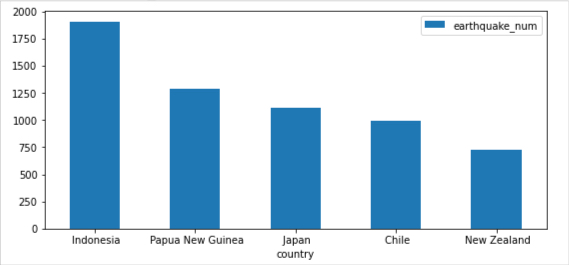

In [31]:
# print the first 5 rows of num2
t = num2.head()[:5]
print(t)

country
               338
Afghanistan    122
Alaska         406
Albania         12
Algeria         12
dtype: int64


In [34]:
# convert what you just printed to a DataFrame with 2 columns: 'country' (text) and 'earthquake_num' (number)
top5_df = pd.DataFrame({'country':list(t.index.astype(str)),'earthquake_num':list(t.values.astype(int))})
top5_df
# Hint: separate the text and numbers and store them separately in lists

,country,earthquake_num
0,,338
1,Afghanistan,122
2,Alaska,406
3,Albania,12
4,Algeria,12


In [ ]:
#@markdown Fill in the blank version. Double click to reveal
# print the first 5 rows of num2
num2.__[:_]

# convert what you just printed to a DataFrame with 2 columns: 'country' (text) and 'earthquake_num' (number)
# Hint: separate the text and numbers and store them separately in lists
top5_df = pd.DataFrame({'country':list(num2.__[__].__),'earthquake_num':list(num2.__[__]._____)})
top5_df

<Axes: xlabel='country'>

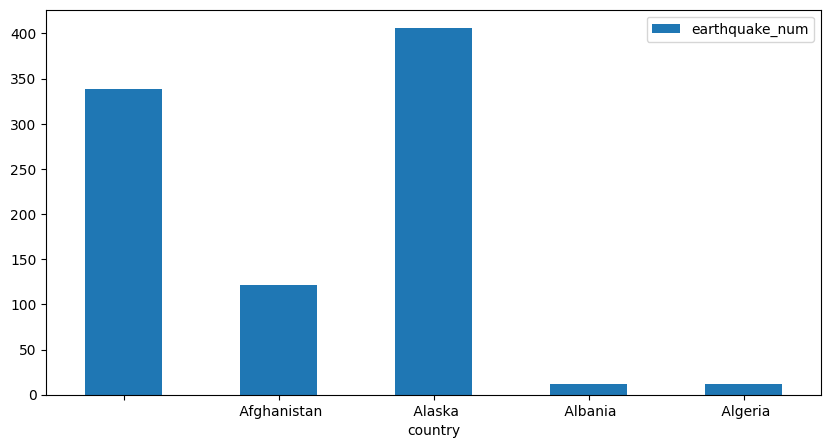

In [35]:
# Now plot the numbers in the top5_df dataset with bar chart.
fig,ax = plt.subplots(figsize=(10,5))
top5_df.plot.bar(x='country',y='earthquake_num',rot=0,ax=ax)

In [ ]:
#@markdown Fill in the blank version. Double click to reveal
# Now plot the numbers in the top5_df dataset with bar chart.
__,__ = plt._______(figsize=(_,_))
top5_df.plot.bar(x=_____,y=_____,rot=0,ax=__)

**Q10) Make a histogram for the distribution of the earthquakes' magnitudes**

Hint: `Pandas` has a histogram function documented [at this link](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html) and `Matplotlib` has one documented [at this link](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)

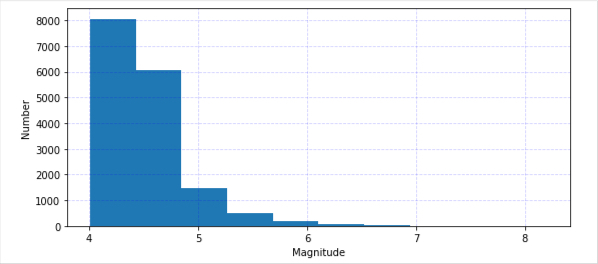

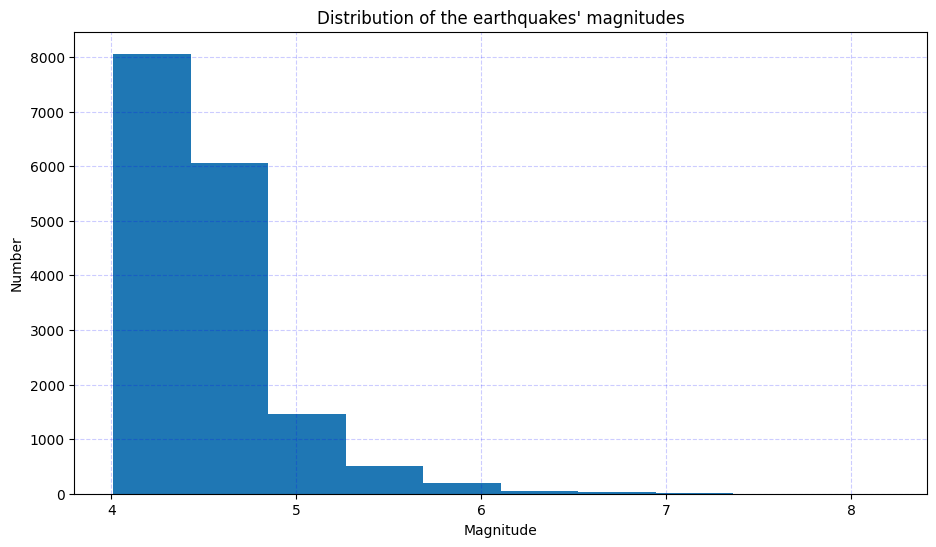

In [40]:
# Make a figure and plot the histogram
fig,ax = plt.subplots(figsize=(11,6))
# Make the histogram using the 'mag' column directly
plt.hist(df_filtered['mag'])
ax.set_xlabel('Magnitude') # X axis label
ax.set_ylabel('Number') # Y axis label
ax.set_title("Distribution of the earthquakes' magnitudes")
ax.grid(alpha=0.2,c='b',ls='--')

In [ ]:
#@markdown Fill in the blank version. Double click to reveal
__,__ = plt.subplots(figsize=(9,4))
# Make the histogram
____.__.____
__.__________('______') # X axis label
__._______('_____') # Y axis label
__._____(alpha=0.2,c='b',ls='--')

##### Use a logarithmic scale for y axis

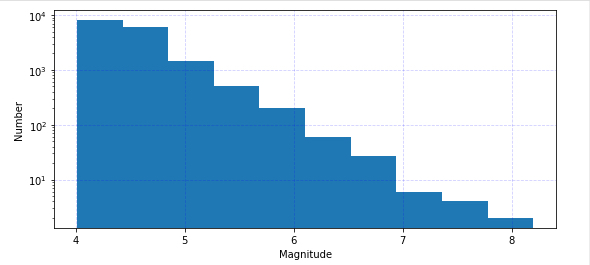

Hint: Here you can find a [tutorial](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yscale.html) for how to change axis scale.

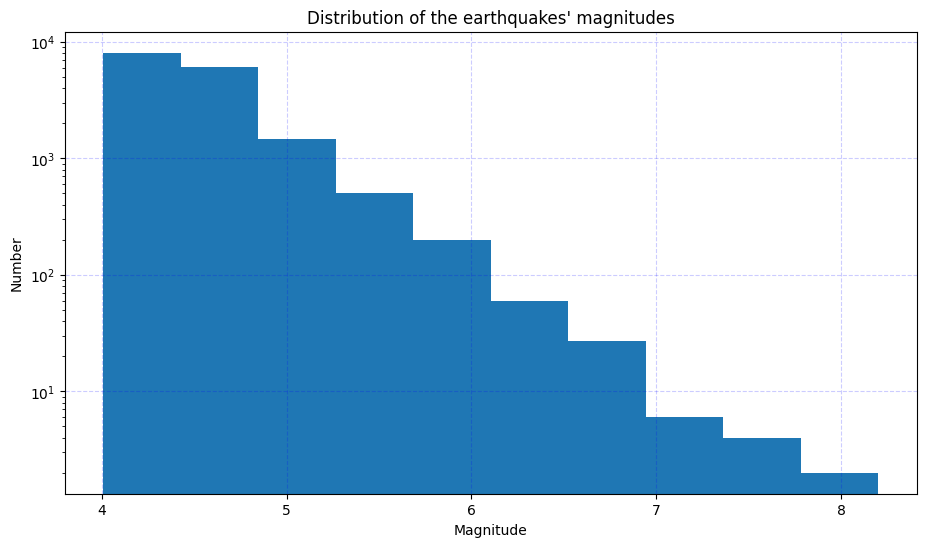

In [41]:
# Make a figure and plot the histogram using a logarithmic scale for y
fig,ax = plt.subplots(figsize=(11,6))
# Make the histogram
plt.hist(df_filtered['mag'])
ax.set_xlabel('Magnitude') # X axis label
ax.set_ylabel('Number') # Y axis label
ax.set_title("Distribution of the earthquakes' magnitudes")
ax.grid(alpha=0.2,c='b',ls='--')
# Use a logarithmic scale for y axis
plt.yscale('log')

In [ ]:
#@markdown Fill in the blank version. Double click to reveal
__,__ = plt.subplots(figsize=(9,4))
# Make the histogram
____.__.____
__.__________('______') # X axis label
__._______('_____') # Y axis label
__._____(alpha=0.2,c='b',ls='--')
# Use a logarithmic scale for y axis
__.______(___)

##### Make one histogram for the filtered dataset, and one for the unfiltered dataset

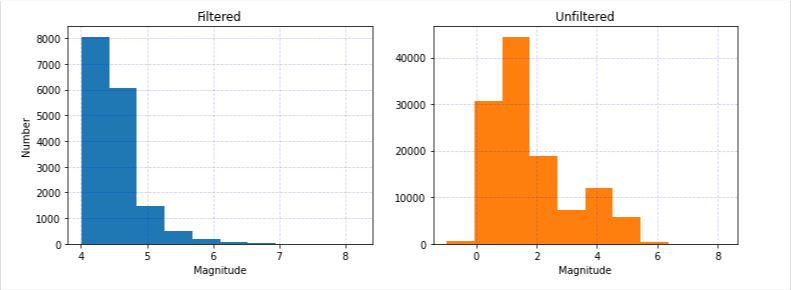

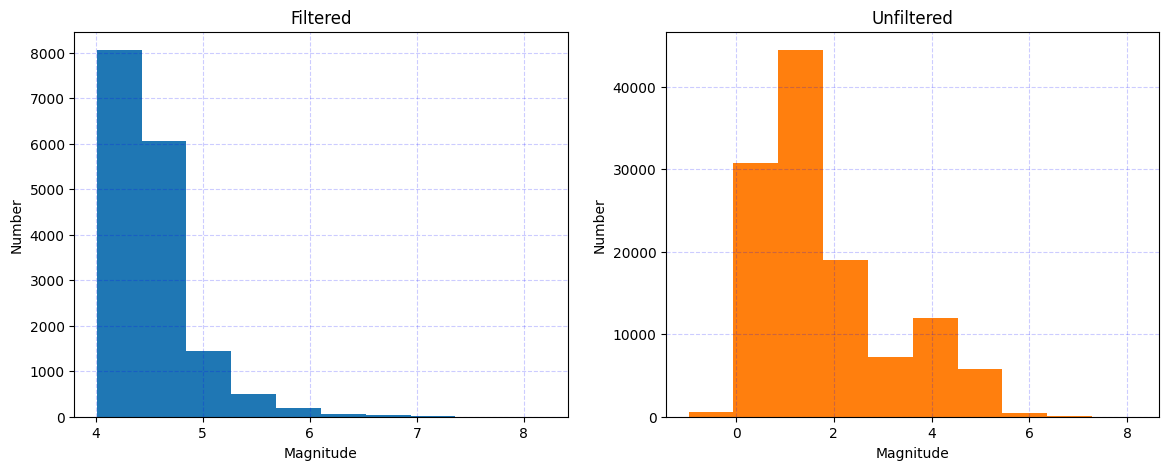

In [43]:
# Make a figure with two subplots, and use one subplot to show the filtered dataset histogram and the other for the unfiltered dataset histogram
fig,ax = plt.subplots(1,2,figsize=(14,5))
df_filtered['mag'].plot.hist(ax=ax[0],color='#1f77b4')
ax[0].set_xlabel('Magnitude')
ax[0].set_ylabel('Number')
ax[0].grid(alpha=0.2,c='b',ls='--')
ax[0].set_title('Filtered')

df['mag'].plot.hist(ax=ax[1],color='#ff7f0e')
ax[1].set_xlabel('Magnitude')
ax[1].set_ylabel('Number')
ax[1].grid(alpha=0.2,c='b',ls='--')
ax[1].set_title('Unfiltered')
plt.show()

In [ ]:
#@markdown Fill in the blank version. Double click to reveal
# Make one histogram for the filtered dataset, and one for the unfiltered dataset
fig,ax = plt.subplots(1,2,figsize=(12,4))
______.__.____(___=____,color='#1f77b4')
__.__________('______') # X axis label
__._______('_____') # Y axis label
__._____(alpha=0.2,c='b',ls='--')
__.________(________) # Add title for the filtered figure on the left

______.__.____(___=____,color='#ff7f0e')
__.__________('______') # X axis label
__._______('_____') # Y axis label
__._____(alpha=0.2,c='b',ls='--')
__.________(________) # Add title for the unfiltered figure on the right
plt.show()

**Q11) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude**

Hint: Consider reading the documentation for [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to make the scatter plot and that of [`plt.colorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) to color the points by magnitude.

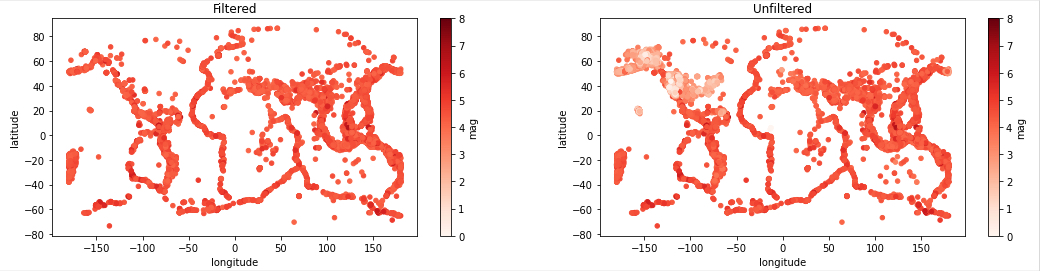

<Axes: xlabel='longitude', ylabel='latitude'>

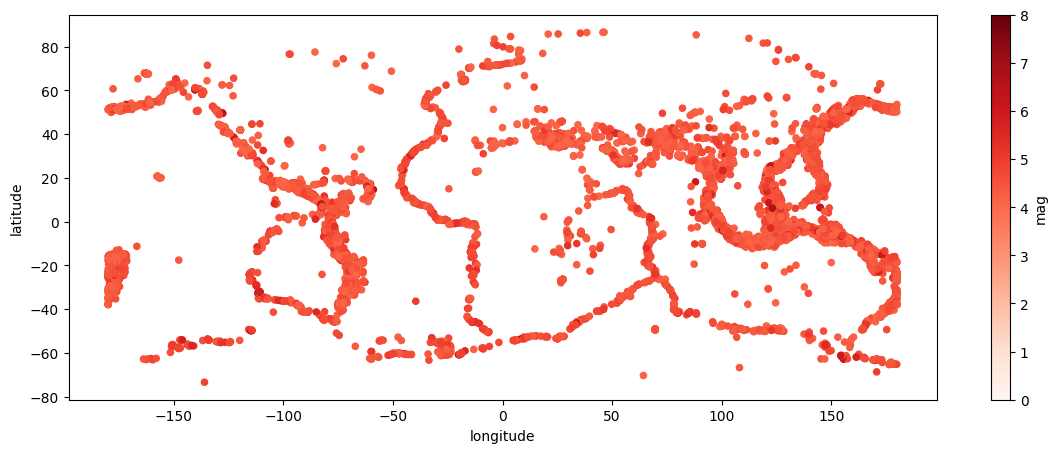

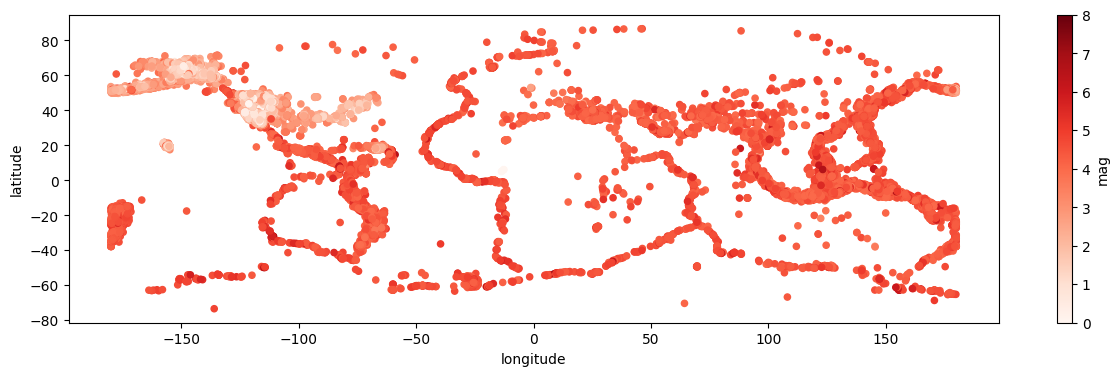

In [54]:
# Make a figure with two subplots, and use one subplot to show the filtered dataset locations, and the other for the unfiltered dataset locations
import matplotlib.pyplot as plt
from matplotlib.cm import Reds

fig,ax = plt.subplots(1,1,figsize=(14,5))
df_filtered.plot.scatter(x='longitude',y='latitude',c='mag',ax=ax,cmap=Reds,vmin=0,vmax=8)  #filtered

fig,ax = plt.subplots(1,1,figsize=(15,4))
df.plot.scatter(x='longitude',y='latitude',c='mag',ax=ax,cmap=Reds,vmin=0,vmax=8)  #unfiltered

In [ ]:
#@markdown Fill in the blank version. Double click to reveal
# Make a figure with two subplots, and use one subplot to show the filtered dataset locations, and the other for the unfiltered dataset locations
__,__ = plt.subplots(_,_,_______=(__,__))
# Filtered data
_____.plot.scatter(x=______,y=_______,c=____,ax=____,cmap=____,vmin=0,vmax=8)
# Unfilted data
df.plot.scatter(x=______,y=_______,c=____,ax=____,cmap=____,vmin=0,vmax=8)
ax[0].set_title('Filtered')
ax[1].set_title('Unfiltered')
plt.show()

Do you notice a difference between filtered and unfiltered datasets?

**Yeah, a lot more earthquakes of low magnitude (<4) in north America and Alaska**

---

**Also a few low mag earthquakes in central Europe**